In [1]:
import albumentations as A
import cv2
from PIL import Image
import matplotlib.pyplot as plt

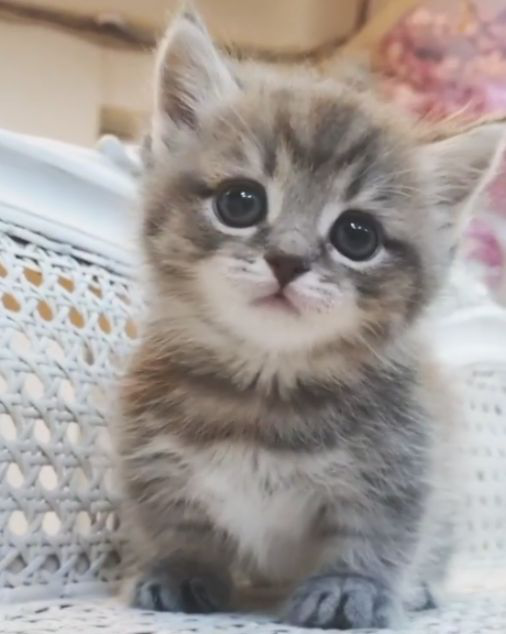

In [2]:
im = Image.open("test.jpg")
display(im)

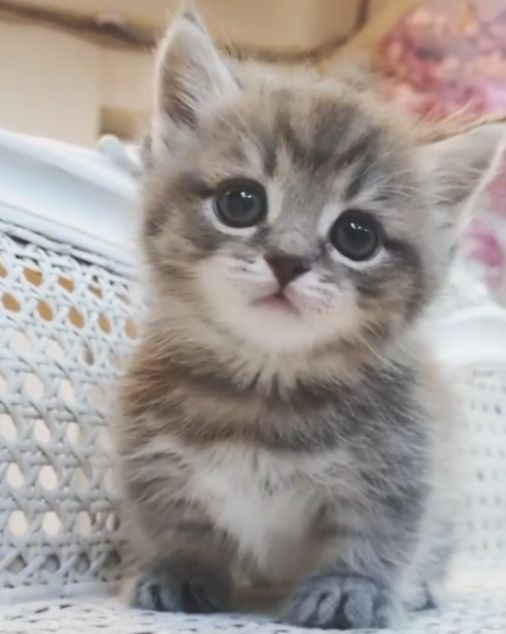

In [3]:
im = cv2.cvtColor(cv2.imread("test.jpg"), cv2.COLOR_BGR2RGB)
display(Image.fromarray(im))

# RandomToneCurve

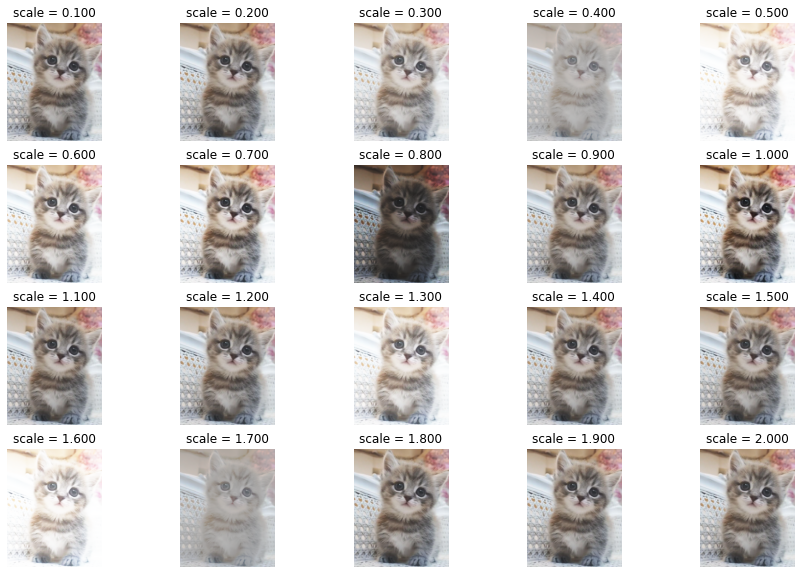

In [4]:
height, width = 224, 224
plt.figure(figsize=(15,10))
display_ims = 20
scale = 0.1
p = 0.5

for i in range(display_ims):   
    tfs = A.Compose([A.RandomToneCurve(scale = scale + scale * i)])
    tfs_im = tfs(image=im)
    plt.subplot(4, display_ims // 4, i+1)
    plt.imshow(tfs_im["image"])
    plt.axis("off")
    plt.title(f"scale = {(scale + scale * i):.3f}")
plt.savefig('pngs/RandomToneCurve.png', dpi=400)

# RGBShift

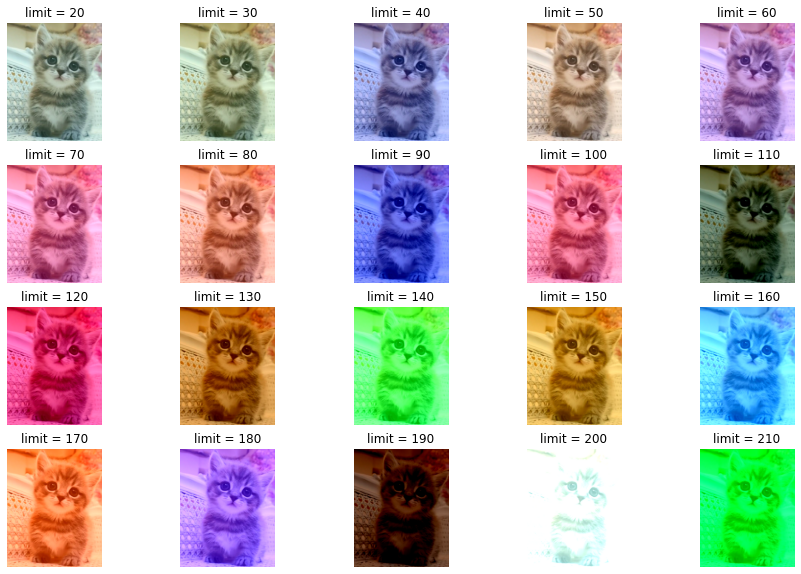

In [5]:
plt.figure(figsize=(15,10))
display_ims = 20
r_shift_limit = 20
g_shift_limit = 20
b_shift_limit = 20
p = 0.5 



for i in range(display_ims):   
    tfs = A.Compose([A.RGBShift(r_shift_limit = r_shift_limit + i * 10, 
                            g_shift_limit = g_shift_limit + i * 10,
                            b_shift_limit = b_shift_limit + i * 10,
                            p = p * (i+1)
                            )])
    tfs_im = tfs(image=im)
    plt.subplot(4, display_ims // 4, i+1)
    plt.imshow(tfs_im["image"])
    plt.axis("off")
    plt.title(f"limit = {(r_shift_limit + i * 10)}")
plt.savefig('pngs/RGBShift.png', dpi=300)

# RingingOvershoot

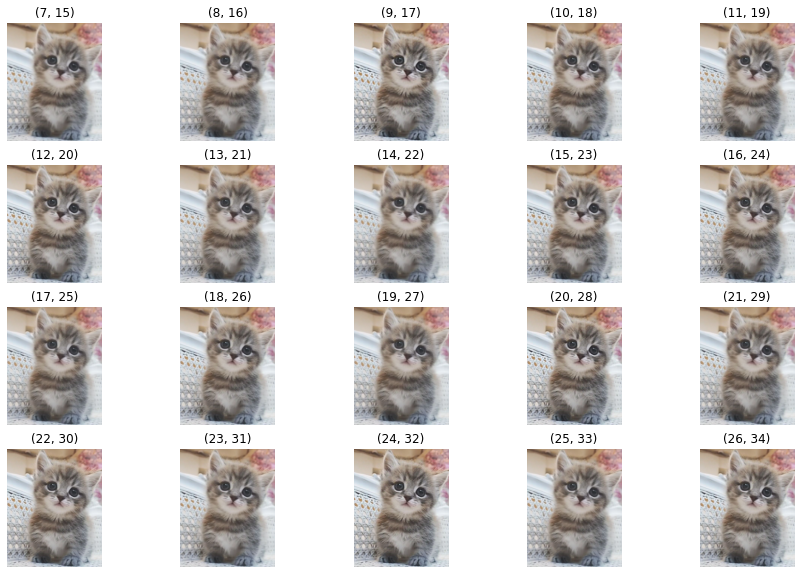

In [6]:
plt.figure(figsize=(15,10))
display_ims = 20
blur_limit = (7, 15) 
cutoff = (0.7853981633974483, 1.5707963267948966)
p = 0.5

for i in range(display_ims):
    if i % 2 == 0:
        tfs = A.Compose([A.RingingOvershoot(blur_limit = (blur_limit[0] + i, blur_limit[1] + i),
                                            cutoff = cutoff,
                                            always_apply=True, p = (p * (i + 1)))])
    else:
        tfs = A.Compose([A.RingingOvershoot(blur_limit = blur_limit,
                                            cutoff = cutoff,
                                            always_apply=True, p = (p * (i + 1)))])
    tfs_im = tfs(image=im)
    plt.subplot(4, display_ims // 4, i+1)
    plt.imshow(tfs_im["image"])
    plt.axis("off")
    plt.title(f"{(blur_limit[0] + i, blur_limit[1] + i)}")
plt.savefig('pngs/RingingOvershoot.png', dpi=400)

# Sharpen

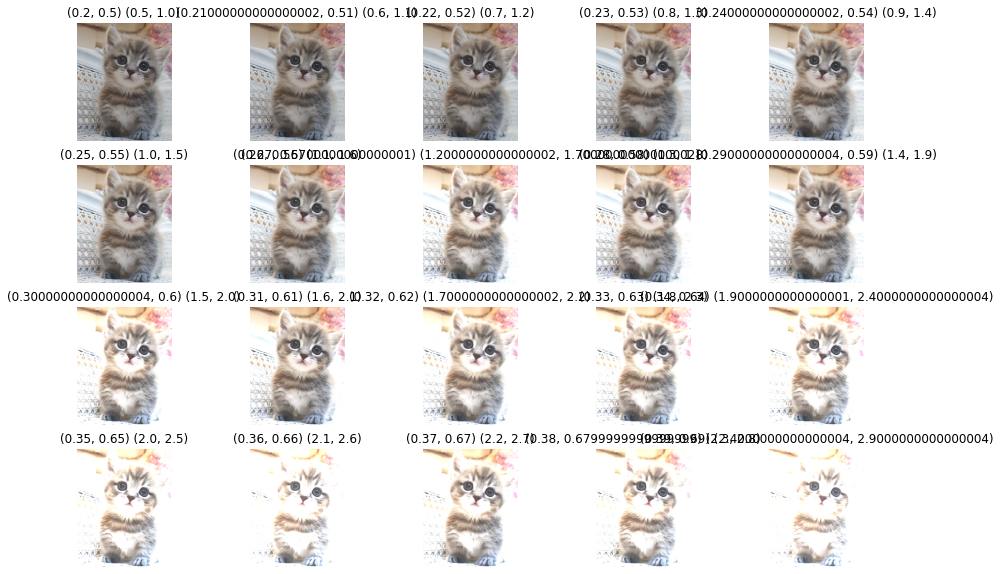

In [7]:
plt.figure(figsize=(15,10))
display_ims = 20
alpha = (0.2, 0.5)
lightness = (0.5, 1.0)
p = 0.5

for i in range(display_ims):   
    tfs = A.Compose([A.Sharpen(alpha = (alpha[0] + i * 0.01, (alpha[1] + i * 0.01)),
                                lightness = (lightness[0] + i * 0.1, (lightness[1] + i * 0.1)),
                                always_apply=True, p = (p * (i + 1)))])
    tfs_im = tfs(image=im)
    plt.subplot(4, display_ims // 4, i+1)
    plt.imshow(tfs_im["image"])
    plt.axis("off")
    plt.title(f"{(alpha[0] + i * 0.01, (alpha[1] + i * 0.01))} {(lightness[0] + i * 0.1, (lightness[1] + i * 0.1))}")
plt.savefig('pngs/Sharpen.png', dpi=300)

# Solarize

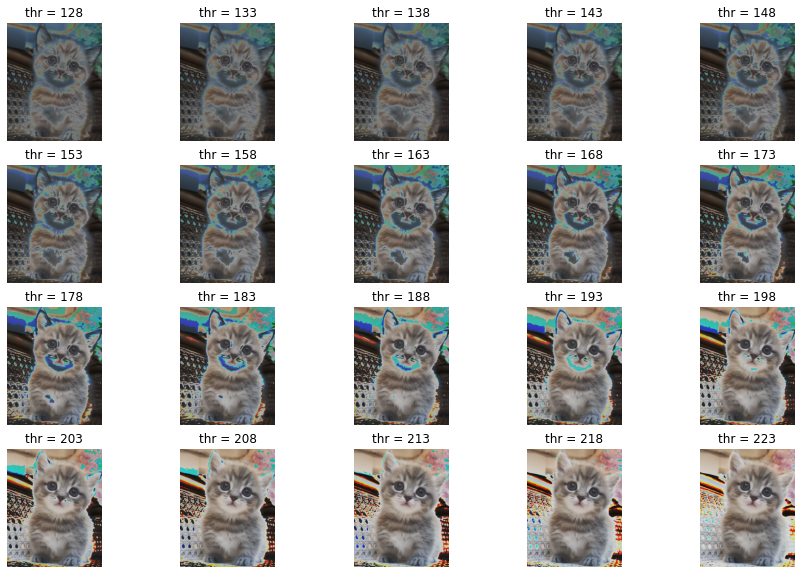

In [8]:
plt.figure(figsize=(15,10))
display_ims = 20
threshold = 128
p = 0.5

for i in range(display_ims):   
    tfs = A.Compose([A.Solarize(threshold = threshold + i * 5,
                                 always_apply=True, p = (p * (i + 1)))])
    tfs_im = tfs(image=im)
    plt.subplot(4, display_ims // 4, i+1)
    plt.imshow(tfs_im["image"])
    plt.axis("off")
    plt.title(f"thr = {int(threshold + i * 5)}")
plt.savefig('pngs/Solarize.png', dpi=400)

# Spatter

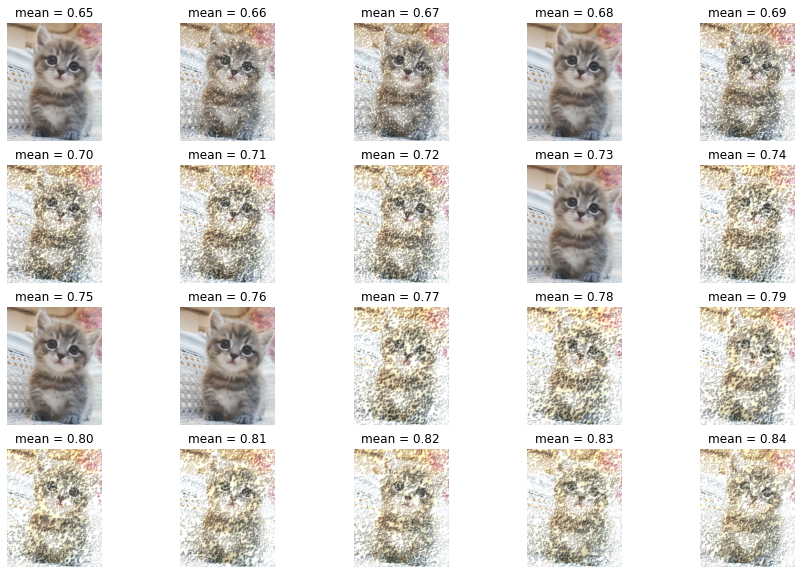

In [9]:
plt.figure(figsize=(15,10))
mean = 0.65
std = 0.3
p = 0.5

for i in range(display_ims):   
    tfs = A.Compose([A.Spatter(mean = mean + i * 0.01,
                               std = std + i * 0.01)])
    tfs_im = tfs(image=im)
    plt.subplot(4, display_ims // 4, i+1)
    plt.imshow(tfs_im["image"])
    plt.axis("off")
    plt.title(f"mean = {(mean + i * 0.01):.2f}")
plt.savefig('pngs/Spatter.png', dpi=400)

# Superpixels

/home/ubuntu/anaconda3/envs/retrieval/lib/python3.10/site-packages/albumentations/augmentations/functional.py:1237: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = skimage.segmentation.slic(image, n_segments=n_segments, compactness=10)


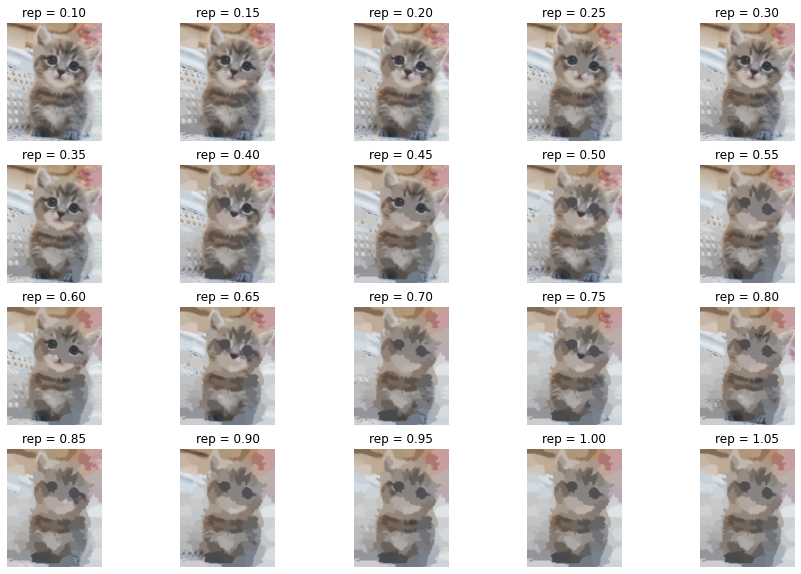

In [10]:
plt.figure(figsize=(15,10))
display_ims = 20
p_replace = 0.1
n_segments = 100
p = 0.5

for i in range(display_ims):   
    tfs = A.Compose([A.Superpixels(p_replace = p_replace + (i * 0.05),
                                   n_segments = int(n_segments + (i * 0.01)),
                                   always_apply=True, p = (p * (i + 1)))])
    tfs_im = tfs(image=im)
    plt.subplot(4, display_ims // 4, i+1)
    plt.imshow(tfs_im["image"])
    plt.axis("off")
    plt.title(f"rep = {p_replace + (i * 0.05):.2f}")
plt.savefig('pngs/Superpixels.png', dpi=400)

# TemplateTransform 

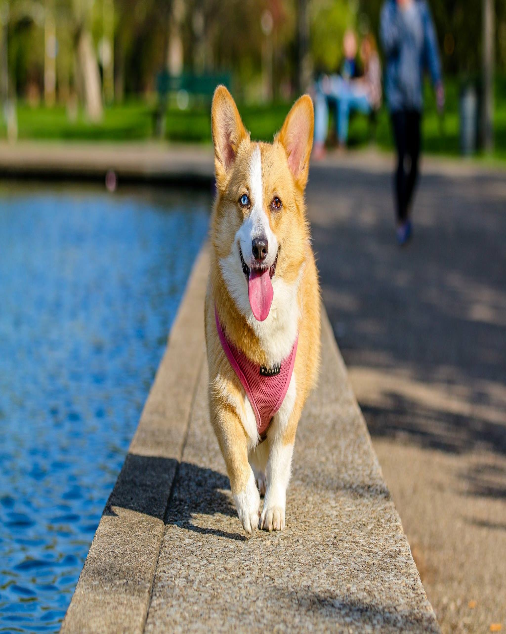

In [11]:
temp = cv2.resize(cv2.cvtColor(cv2.imread("test1.jpg"), cv2.COLOR_BGR2RGB), (506, 634))
display(Image.fromarray(temp))

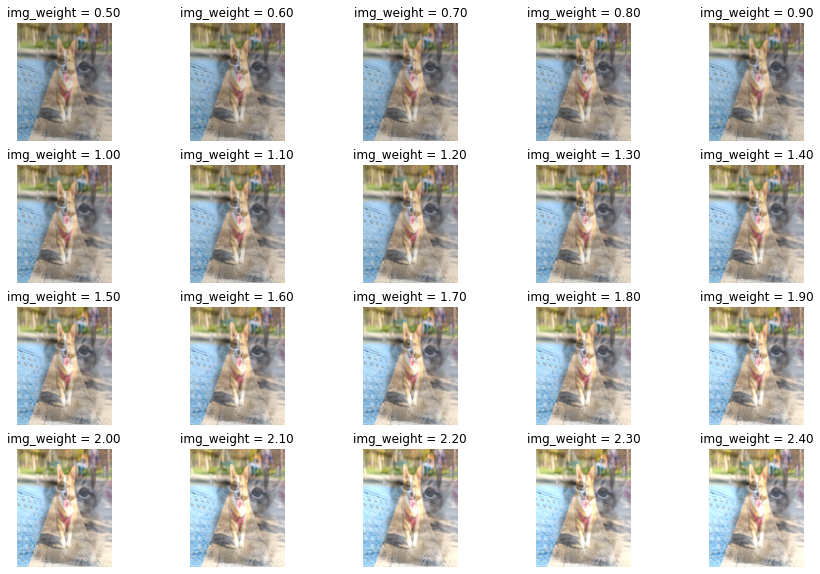

In [12]:
plt.figure(figsize=(15,10))
display_ims = 20
img_weight = 0.5
template_weight = 0.5
p = 0.5

for i in range(display_ims):   
    tfs = A.Compose([A.TemplateTransform(temp, img_weight = img_weight + i * 0.01,
                                         template_weight = template_weight + i * 0.01,
                                         always_apply=True, p = (p * (i + 1)))])
    tfs_im = tfs(image=im)
    plt.subplot(4, display_ims // 4, i+1)
    plt.imshow(tfs_im["image"])
    plt.axis("off")
    plt.title(f"img_weight = {(img_weight + i * 0.1):.2f}")
plt.savefig('pngs/TemplateTransform.png', dpi=400)

# ToSepia

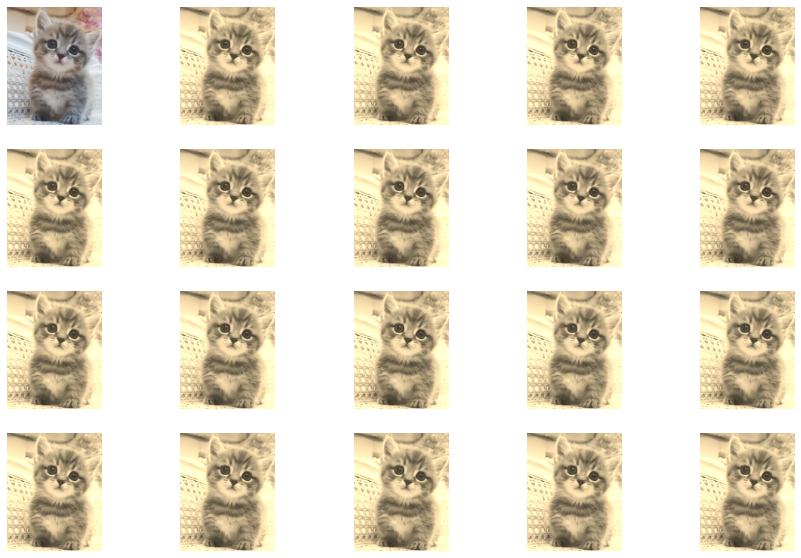

In [13]:
plt.figure(figsize=(15,10))
display_ims = 20
p = 0.5

for i in range(display_ims):   
    tfs = A.Compose([A.ToSepia(always_apply=False, p = (p * (i + 1)))])
    tfs_im = tfs(image=im)
    plt.subplot(4, display_ims // 4, i+1)
    plt.imshow(tfs_im["image"])
    plt.axis("off")
    # plt.title(f"{(fog_coef_lower + i * 0.01):.3f} {(fog_coef_upper + i * 0.01):.3f} {(alpha_coef + i * 0.04):.3f}")
plt.savefig('pngs/ToSepia.png', dpi=400)

# UnsharpMask

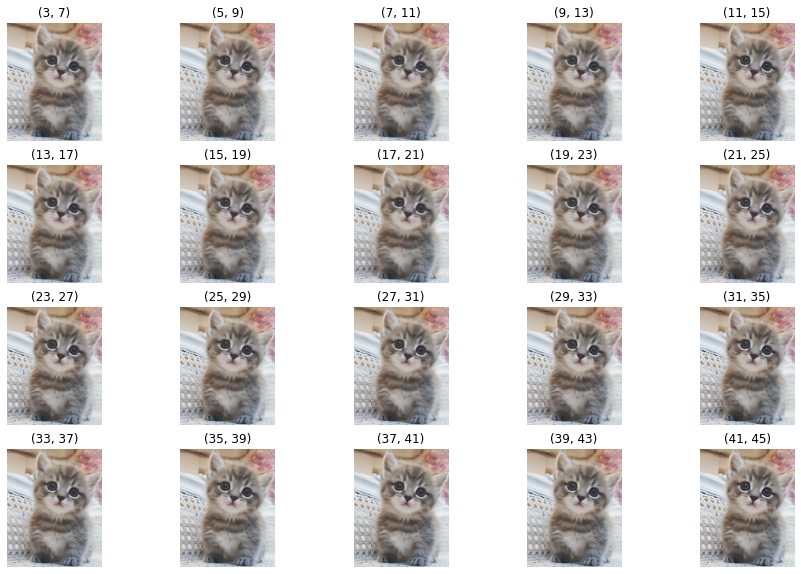

In [14]:
plt.figure(figsize=(15,10))
display_ims = 20
blur_limit = (3, 7)
p = 0.5

for i in range(display_ims):   
    tfs = A.Compose([A.UnsharpMask(blur_limit = (blur_limit[0] + i * 2, blur_limit[1] + i * 2),
                                   always_apply=False, p = (p * (i + 1)))])
    tfs_im = tfs(image=im)
    plt.subplot(4, display_ims // 4, i+1)
    plt.imshow(tfs_im["image"])
    plt.axis("off")
    plt.title(f"{blur_limit[0] + i * 2, blur_limit[1] + i * 2}")
plt.savefig('pngs/UnsharpMask.png', dpi=400)